# Part 1: Data Exploration

In [1105]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
df = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
df = df.dropna()
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [1106]:
df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [1107]:
region_counts = df['region'].value_counts()
print(region_counts)

region
southeast    125
northeast    108
southwest    103
northwest     95
Name: count, dtype: int64
region
southeast    125
northeast    108
southwest    103
northwest     95
Name: count, dtype: int64


In [1108]:
sex_distribution = df['sex'].value_counts(normalize=True) * 100
print(sex_distribution)

sex
female    52.204176
male      47.795824
Name: proportion, dtype: float64
sex
female    52.204176
male      47.795824
Name: proportion, dtype: float64


In [1109]:
smoker_distribution = df['smoker'].value_counts(normalize=True) * 100
print(smoker_distribution)

smoker
no     79.814385
yes    20.185615
Name: proportion, dtype: float64
smoker
no     79.814385
yes    20.185615
Name: proportion, dtype: float64


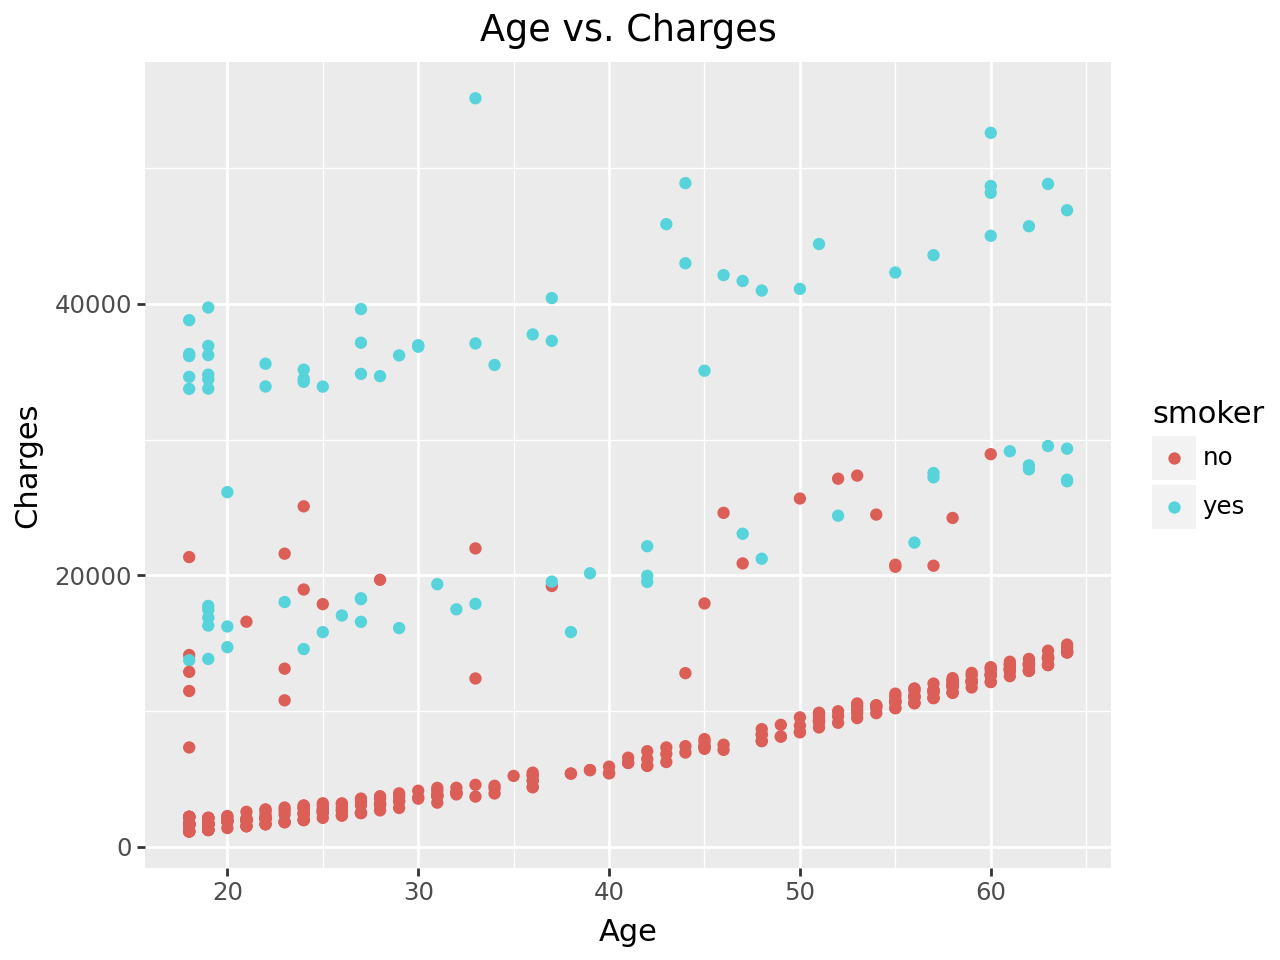

In [1110]:
from plotnine import *

(ggplot(df, aes(x='age', y='charges', color = 'smoker')) 
+ geom_point() 
+ labs(x='Age', y='Charges', title='Age vs. Charges'))

The graph titled "Age vs. Charges" is a scatter plot that shows the relationship between age and medical charges, with the data points colored based on whether an individual is a smoker or not. Blue dots represent individuals who smoke, while red dots represent individuals who do not smoke. Based on this graph, there seems to be a positive correlation between age and charges, especially for smokers. As age increases, medical charges tend to increase, especially for individuals who smoke.

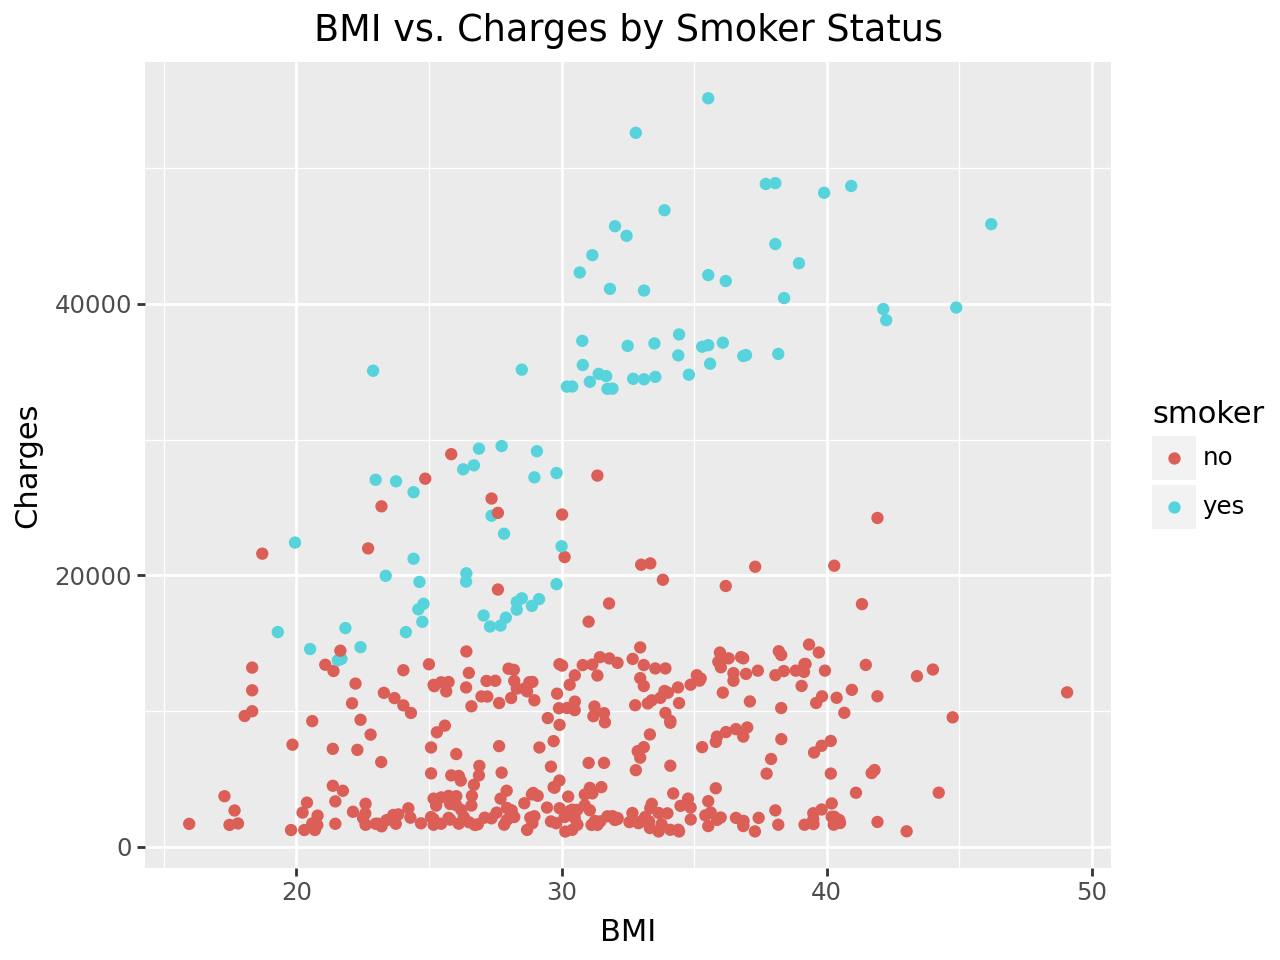

In [1111]:
(ggplot(df, aes(x='bmi', y='charges', color='smoker')) 
 + geom_point() 
 + labs(x='BMI', y='Charges', title='BMI vs. Charges by Smoker Status'))

This plot titled "BMI vs. Charges by Smoker Status" represents the relationship between Body Mass Index (BMI) and medical charges, with the differentiation of whether an individual is a smoker or not. Based on this visualization, there seems to be a positive correlation between BMI and medical charges. Meaning as a persons BMI increases, their medical charges tend to increase as well. This visualization also shows that smokers tend to have much higher medical charges compared to non-smokers, highlighting the impact of smoking on medical costs. 

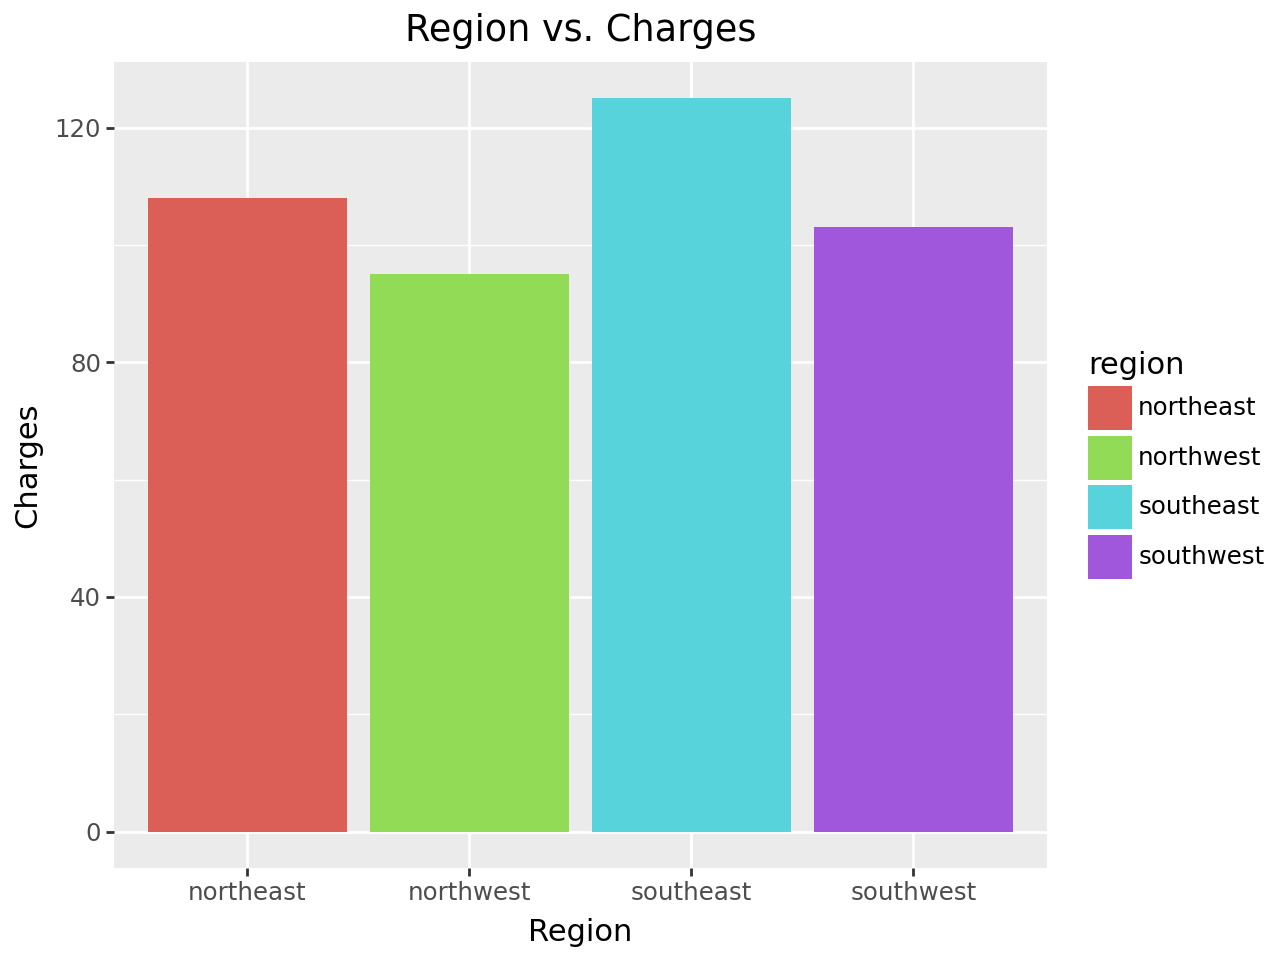

In [1112]:
(ggplot(df, aes(x='region', fill = 'region')) 
 + geom_bar() 
 + labs(x='Region', y='Charges', title='Region vs. Charges'))

This plot titled "Region vs. Charges" is a bar chart that compares the average medical charges across different regions in the US. Based on this visualization, the Southeast region appears to have significantly higher costs compared to the other three regions. This visualization also shows that the Northwest region tends to have lower medical charges compared the other three regions. 

# Part 2: Simple Linear Models

In [1113]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [1114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [1115]:
slm_values = []

Simple Linear Model to predict insurance charges from age.

In [1116]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

print(pipeline1_fit.named_steps['linear_regression'].coef_)

[3529.25061209]
[3529.25061209]


Based on this coefficient, for every standard deviation increase in age, insurance charges will increase by $3529.25

In [1117]:
test_predict_1 = pipeline1_fit.predict(X_test)

testMSE_1 = mean_squared_error(y_test, test_predict_1)
print(testMSE_1)

test_r2_score_1 = r2_score(y_test, test_predict_1)
print(test_r2_score_1)

slm_values.append({
    "Model" : 1,
    "Test MSE" : testMSE_1,
    "Test R Sq" : test_r2_score_1
})


128051877.19865291
0.1119166671162165
128051877.19865291
0.1119166671162165


Based on this model's small R-Squared values, this model does not seem to fit the data well. The low R-squared value indicates that the model explains only a small portion of the variance in the charges variable. 

Predicting charges from age and sex.

In [1118]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["sex"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

print(pipeline1_fit.named_steps['linear_regression'].coef_)

[1194.77641949 3521.35089443]
[1194.77641949 3521.35089443]


Based on these coefficients, if you are a male, you will pay $1194.78 more in insurance charges than woman. For every standard deviation increase in age, the insurance charges will increase by $3521.35

In [1119]:
test_predict_2 = pipeline1_fit.predict(X_test)

testMSE_2 = mean_squared_error(y_test, test_predict_2)
print(testMSE_2)

test_r2_score_2 = r2_score(y_test, test_predict_2)
print(test_r2_score_2)

slm_values.append({
    "Model" : 2,
    "Test MSE" : testMSE_2,
    "Test R Sq" : test_r2_score_2
})

128963874.91827796
0.10559165266000081
128963874.91827796
0.10559165266000081


Based on this model's small R-Squared values, this model does not seem to fit the data well. The low R-squared value indicates that the model explains only a small portion of the variance in the charges variable. 

Predicting charges from smoker. 

In [1120]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

print(pipeline1_fit.named_steps['linear_regression'].coef_)

[23622.59536849  3981.87961909]
[23622.59536849  3981.87961909]


Based on these coefficients, if you are a smoker, you will pay $23622.60 more in insurance charges than non smokers. For every standard deviation increase in age, the insurance charges will increase by $3981.88

In [1121]:
test_predict_3 = pipeline1_fit.predict(X_test)

testMSE_3 = mean_squared_error(y_test, test_predict_3)
print(testMSE_3)

test_r2_score_3 = r2_score(y_test, test_predict_3)
print(test_r2_score_3)

slm_values.append({
    "Model" : 3,
    "Test MSE" : testMSE_3,
    "Test R Sq" : test_r2_score_3
})


30425065.327423196
0.7889918210471257
30425065.327423196
0.7889918210471257


Based on this model's high R-Squared values, this model seem's to fit the data a lot better than the previous two models. The high R-squared value indicates that the model explains a large portion of the variance in the charges variable. 

In [1122]:
slm_values = pd.DataFrame(slm_values)
slm_values

,Model,Test MSE,Test R Sq
0,1,1.280519e+08,0.111917
1,2,1.289639e+08,0.105592
2,3,3.042507e+07,0.788992


Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

Based on the MSE and R-Squared values from models 2 and 3, I think model 3 is a much better fit for the data. Model 3 has higher MSE values, but Model 3 also has much larger R-Squared values showing that this model is a better fit for the data than model 2. 

# Part 3: Multiple Linear Models

In [1123]:
mlm_values = []

Fit a model using Age and BMI as predictors. 

In [1124]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop" 
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [1125]:
test_predict_4 = pipeline1_fit.predict(X_test)

testMSE_4 = mean_squared_error(y_test, test_predict_4)
print(testMSE_4)

test_r2_score_4 = r2_score(y_test, test_predict_4)
print(test_r2_score_4)

mlm_values.append({
    "Model" : 4,
    "Test MSE" : testMSE_4,
    "Test R Sq" : test_r2_score_4
})

125653921.90574457
0.1285473028805686
125653921.90574457
0.1285473028805686


Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

This model is very similar to the model from Part Two Q1. This model has very similar large MSE values and small R-Squared values. This model's R-Squared value is slightly higher than the model from Part Two Q1 indicating a slightly better fit for the data. 

Fit a model that uses age and age^2 as predictors.

In [1126]:
ct1 = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 2), ["age"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [1127]:
test_predict_5 = pipeline1_fit.predict(X_test)

testMSE_5 = mean_squared_error(y_test, test_predict_5)
print(testMSE_5)

test_r2_score_5 = r2_score(y_test, test_predict_5)
print(test_r2_score_5)

mlm_values.append({
    "Model" : 5,
    "Test MSE" : testMSE_5,
    "Test R Sq" : test_r2_score_5
})

129732327.37596215
0.10026217343085853
129732327.37596215
0.10026217343085853


How do the MSE and R-squared compare to the model in P2 Q1?

This model has almost the same MSE and R-Squared values as the model from Part Two Q1. Based on both of the model's very large MSE values and small R-Squared values, both models don't seem to fit the data well, however the model from Part Two Q1 has a slightly higher R-Squared value indicating it has a better fit for the data. 

Fit a polynomial of degree 4. 

In [1128]:
ct1 = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 4), ["age"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [1129]:
test_predict_6 = pipeline1_fit.predict(X_test)

testMSE_6 = mean_squared_error(y_test, test_predict_6)
print(testMSE_6)

test_r2_score_6 = r2_score(y_test, test_predict_6)
print(test_r2_score_6)

mlm_values.append({
    "Model" : 6,
    "Test MSE" : testMSE_6,
    "Test R Sq" : test_r2_score_6
})

130228590.91009322
0.09682041698791244
130228590.91009322
0.09682041698791244


How do the MSE and R-squared compare to the model in P2 Q1?

This model has almost the same MSE and R-Squared values as the model from Part Two Q1. Based on both of the model's very large MSE values and small R-Squared values, both models don't seem to fit the data well, however the model from Part Two Q1 has a slightly higher R-Squared value and lower MSE value indicating it has a better fit for the data. 

Fit a polynomial model of degree 12. 

In [1130]:
ct1 = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 12), ["age"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X_train, y_train)

In [1131]:
test_predict_7 = pipeline1_fit.predict(X_test)

preds = pipeline1_fit.predict(X)

testMSE_7 = mean_squared_error(y_test, test_predict_7)
print(testMSE_7)

test_r2_score_7 = r2_score(y_test, test_predict_7)
print(test_r2_score_7)

mlm_values.append({
    "Model" : 7,
    "Test MSE" : testMSE_7,
    "Test R Sq" : test_r2_score_7
})

133592694.93405901
0.073489211080353
133592694.93405901
0.073489211080353


How do the MSE and R-squared compare to the model in P2 Q1?

This model has a much lower R-Squared value compared to the model in Part Two Q1 and a higher MSE value indicating that this model is not a better fit for the data. 

In [1132]:
mlm_values = pd.DataFrame(mlm_values)
mlm_values

,Model,Test MSE,Test R Sq
0,4,1.256539e+08,0.128547
1,5,1.297323e+08,0.100262
2,6,1.302286e+08,0.096820
3,7,1.335927e+08,0.073489


According to the MSE and R-squared values, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Based on the MSE and R-Squared values from model's 4-7, model 4 is the best model as it has the lowest Test MSE value and the highest Test R-Squared value. I do not think that model 4 is the best model out there because I am sure there is a model that we haven't created yet that would have a better MSE and R-Squared values that would better fit the data. 

Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

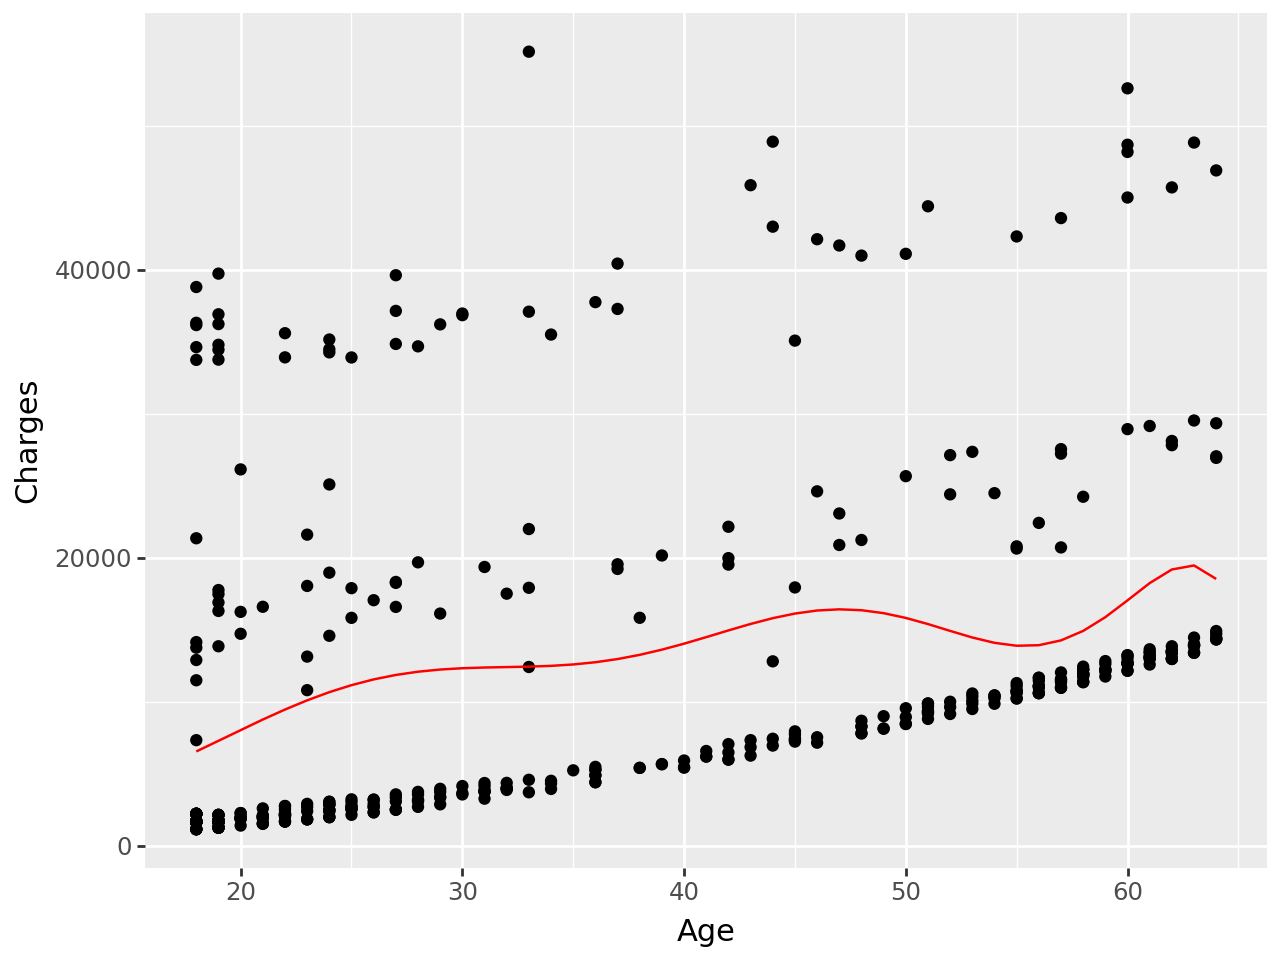

In [1133]:
(ggplot(df)
 + geom_point(aes(x="age", y="charges")) 
 + geom_line(aes(x='age', y=preds), color='red')
 + labs(x='Age', y='Charges'))
 

# Part 4: New Data

In [1134]:
df2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
df2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [1135]:
X2 = df2.drop('charges', axis = 1)
y2 = df2['charges']

Model with only age as the predictor:

In [1136]:
new_data_values = []

In [1137]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop" 
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X, y)

In [1138]:
test_predict_8 = pipeline1_fit.predict(X2)

testMSE_8 = mean_squared_error(y2, test_predict_8)
print(testMSE_8)

test_r2_score_8 = r2_score(y2, test_predict_8)
print(test_r2_score_8)

new_data_values.append({
    "Model" : 8,
    "Test MSE" : testMSE_8,
    "Test R Sq" : test_r2_score_8
})

136077136.50195494
0.12236515675533055
136077136.50195494
0.12236515675533055


Model with age and bmi as the predictors:

In [1139]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X, y)

In [1140]:
test_predict_9 = pipeline1_fit.predict(X2)

testMSE_9 = mean_squared_error(y2, test_predict_9)
print(testMSE_9)

test_r2_score_9 = r2_score(y2, test_predict_9)
print(test_r2_score_9)

new_data_values.append({
    "Model" : 9,
    "Test MSE" : testMSE_9,
    "Test R Sq" : test_r2_score_9
})

132636406.1108129
0.14455628272331222
132636406.1108129
0.14455628272331222


Model with age, bmi, and smoker as the predictors:

In [1141]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"])
  ],
  remainder = "drop" 
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

pipeline1_fit = lr_pipeline.fit(X, y)

In [1142]:
test_predict_10 = pipeline1_fit.predict(X2)

testMSE_10 = mean_squared_error(y2, test_predict_10)
print(testMSE_10)

test_r2_score_10 = r2_score(y2, test_predict_10)
print(test_r2_score_10)

new_data_values.append({
    "Model" : 10,
    "Test MSE" : testMSE_10,
    "Test R Sq" : test_r2_score_10
})

35377541.24141636
0.7718311565047797
35377541.24141636
0.7718311565047797


Model with age and bmi both with interaction terms with smoker as the predictors:

In [1143]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)


In [1144]:
predict_all = pipeline1_fit.predict(X2)

testMSE_11 = mean_squared_error(y2, predict_all)
print(testMSE_11)

test_r2_score_11 = r2_score(y2, predict_all)
print(test_r2_score_11)

new_data_values.append({
    "Model" : 11,
    "Test MSE" : testMSE_11,
    "Test R Sq" : test_r2_score_11
})

128511296.37352593
0.17116134019818707
128511296.37352593
0.17116134019818707


Model with age, bmi, and smoker as the predictors with both quantitative variables having an interaction term with smoker:

In [1145]:
ct1 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker"])
  ],

  remainder = "drop" #Anything that isnt in the columns Bldg Type, Gr Liv Area, TotRms AbvGrd you drop all the other columns in the dataframe.
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1146]:
predict_all2 = pipeline1_fit.predict(X2)

testMSE_12 = mean_squared_error(y2, predict_all2)
print(testMSE_12)

test_r2_score_12 = r2_score(y2, predict_all2)
print(test_r2_score_12)

new_data_values.append({
    "Model" : 12,
    "Test MSE" : testMSE_12,
    "Test R Sq" : test_r2_score_12
})

21786256.866852585
0.8594886795699616
21786256.866852585
0.8594886795699616


In [1147]:
new_data_values = pd.DataFrame(new_data_values)
new_data_values

,Model,Test MSE,Test R Sq
0,8,1.360771e+08,0.122365
1,9,1.326364e+08,0.144556
2,10,3.537754e+07,0.771831
3,11,1.285113e+08,0.171161
4,12,2.178626e+07,0.859489


Based on the MSE's which is the best model to use? 

Based on the R-Squared values from models 8-12, model 12 is the best model to use as it has the significantly higher R-Squared value. 

Make a plot showing the residuals of your final chosen model.

In [1148]:
residuals = y2 - predict_all2

results_df = pd.DataFrame({'Predicted': predict_all2, 'Residual': residuals})

results_df

,Predicted,Residual
0,3597.873351,-1771.030351
1,12149.436734,-1547.051734
2,2305.366140,-1168.355140
3,13864.402577,587.432573
4,13892.414696,-122.316796
...,...,...
138,33030.205316,1798.448684
139,32670.261048,29922.612042
140,28373.298919,9456.425281
141,3820.240500,-1355.621700


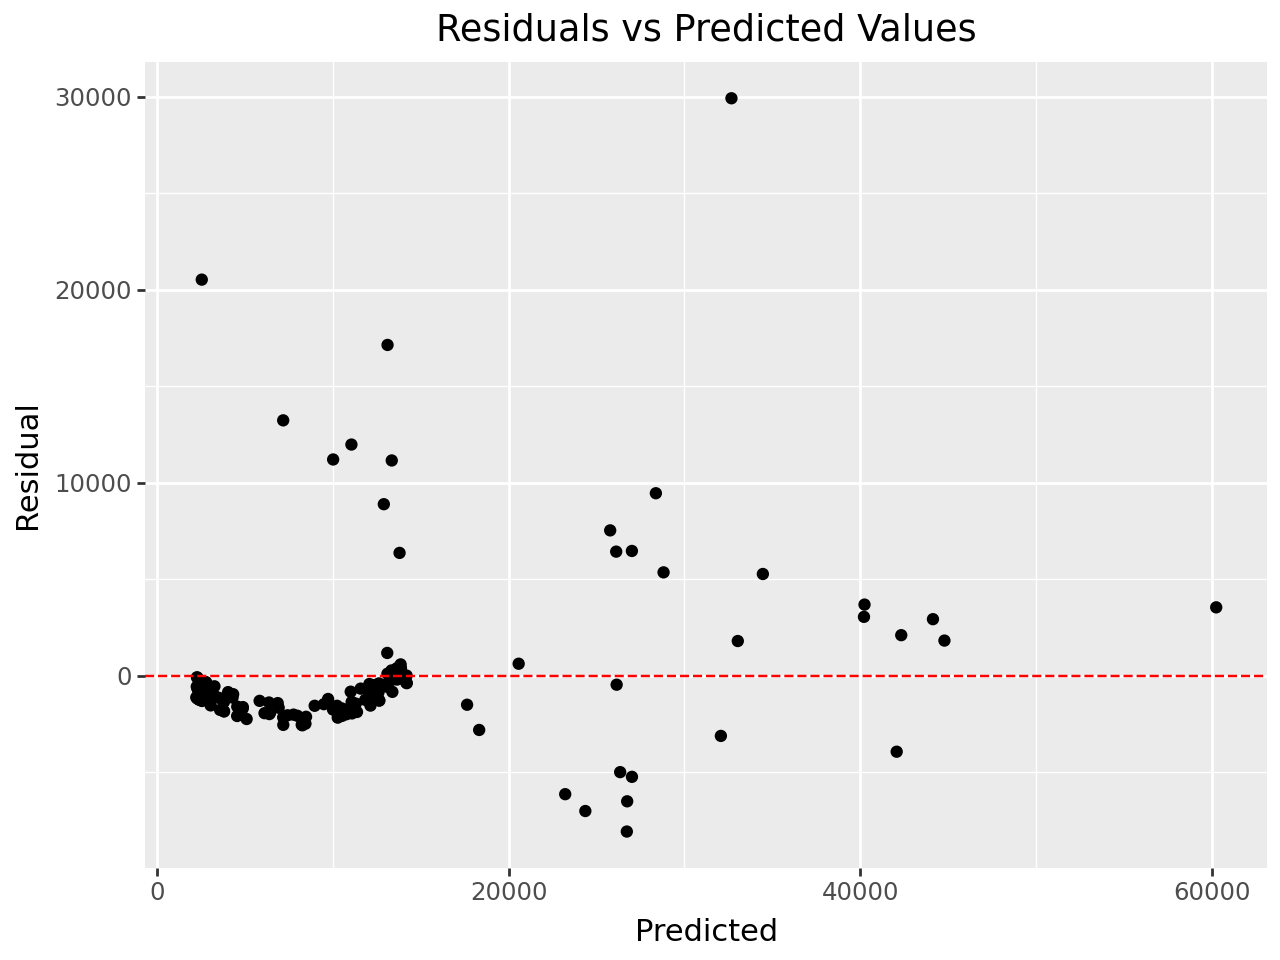

In [1149]:
from plotnine import ggplot, aes, geom_line, labs

(ggplot(results_df)
 + geom_point(aes(x="Predicted", y="Residual"))
  + geom_hline(yintercept=0, linetype="dashed", color="red") 
 + labs(title="Residuals vs Predicted Values", x="Predicted", y="Residual"))

# Part 5: Full Exploration

Model 15:

In [1150]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker", "sex"]),
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction3", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__sex_male"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes", "interaction3__dummify__sex_male"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1151]:
predict_all3 = pipeline1_fit.predict(X2)

test_r2_score_15 = r2_score(y2, predict_all3)
print(test_r2_score_15)

0.8582057736575224
0.8582057736575224


Model 16:

In [1152]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker", "sex"]),
    ("poly", PolynomialFeatures(degree = 3), ["age"]),
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction3", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__sex_male"]),
    ("interaction4", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__sex_male"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes", "interaction3__dummify__sex_male", "interaction4__poly__age^3 dummify__sex_male"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1153]:
predict_all4 = pipeline1_fit.predict(X2)

test_r2_score_16 = r2_score(y2, predict_all4)
print(test_r2_score_16)

0.8586595783889885
0.8586595783889885


Model 17:

In [1154]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker", "sex"]),
    ("poly", PolynomialFeatures(degree = 3), ["age"]),
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction3", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__sex_male"]),
    ("interaction4", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__sex_male"]),
    ("interaction5", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__smoker_yes"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes", "interaction3__dummify__sex_male",
    "interaction4__poly__age^3 dummify__sex_male", "interaction5__poly__age^3 dummify__smoker_yes"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1155]:
predict_all5 = pipeline1_fit.predict(X2)

test_r2_score_17 = r2_score(y2, predict_all5)
print(test_r2_score_17)

0.8583158454819997
0.8583158454819997


Model 18:

In [1156]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker", "sex"]),
    ("poly", PolynomialFeatures(degree = 3), ["age", "bmi"]),
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction3", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__sex_male"]),
    ("interaction4", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__sex_male"]),
    ("interaction5", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__smoker_yes"]),
    ("interaction6", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__bmi^3", "dummify__smoker_yes"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes", "interaction3__dummify__sex_male",
    "interaction4__poly__age^3 dummify__sex_male", "interaction5__poly__age^3 dummify__smoker_yes", "interaction6__poly__bmi^3 dummify__smoker_yes"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1157]:
predict_all6 = pipeline1_fit.predict(X2)

test_r2_score_18 = r2_score(y2, predict_all6)
print(test_r2_score_18)

0.8555195919316441
0.8555195919316441


Model 19:

In [1158]:
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, drop="first"), ["smoker", "sex"]),
    ("poly", PolynomialFeatures(degree = 3), ["age", "bmi"]),
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],

  remainder = "drop" 
).set_output(transform="pandas")

ct2 = ColumnTransformer([
    ("interaction1", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__age", "dummify__smoker_yes"]),
    ("interaction2", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__smoker_yes"]),
    ("interaction3", PolynomialFeatures(interaction_only = True, include_bias=False), ["standardize__bmi", "dummify__sex_male"]),
    ("interaction4", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__sex_male"]),
    ("interaction5", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__age^3", "dummify__smoker_yes"]),
    ("interaction6", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__bmi^3", "dummify__smoker_yes"]),
    ("interaction7", PolynomialFeatures(interaction_only = True, include_bias=False), ["poly__bmi^3", "dummify__sex_male"])]
)

ct3 =  ColumnTransformer([
    ("keep", FunctionTransformer(None), ["interaction1__standardize__age dummify__smoker_yes", "interaction2__standardize__bmi dummify__smoker_yes", 
    "interaction1__standardize__age", "interaction2__standardize__bmi", "interaction1__dummify__smoker_yes", "interaction3__dummify__sex_male",
    "interaction4__poly__age^3 dummify__sex_male", "interaction5__poly__age^3 dummify__smoker_yes", "interaction6__poly__bmi^3 dummify__smoker_yes",
    "interaction7__poly__bmi^3 dummify__sex_male"])],
    remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct1),
  ("preprocessing2", ct2),
  ("preprocessing3", ct3),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

pipeline1_fit = lr_pipeline.fit(X, y)

In [1159]:
predict_all7 = pipeline1_fit.predict(X2)

test_r2_score_19 = r2_score(y2, predict_all7)
print(test_r2_score_19)

0.855983493825453
0.855983493825453


Based on all five models I created in Part 5, model 16 has the highest R-Squared value at 0.8586, however it looks like model 12 we had previously created from Part 4 still has the highest R-Squared value at 0.8592. By adding numeruous additional variables and interaction terms to models I created in Part 5, I still wasn't able to find a model that topped the R-Squared value from model 12. 

Make a plot showing the residuals of your final chosen model!

In [1160]:
final_residuals = y2 - predict_all4

final_results_df = pd.DataFrame({'Predicted': predict_all4, 'Residual': final_residuals})

final_results_df

,Predicted,Residual
0,3154.117998,-1327.274998
1,12122.508994,-1520.123994
2,1888.460034,-751.449034
3,13793.453552,658.381598
4,14212.253534,-442.155634
...,...,...
138,32718.348819,2110.305181
139,32414.487603,30178.385487
140,28080.991090,9748.733110
141,4176.243938,-1711.625138


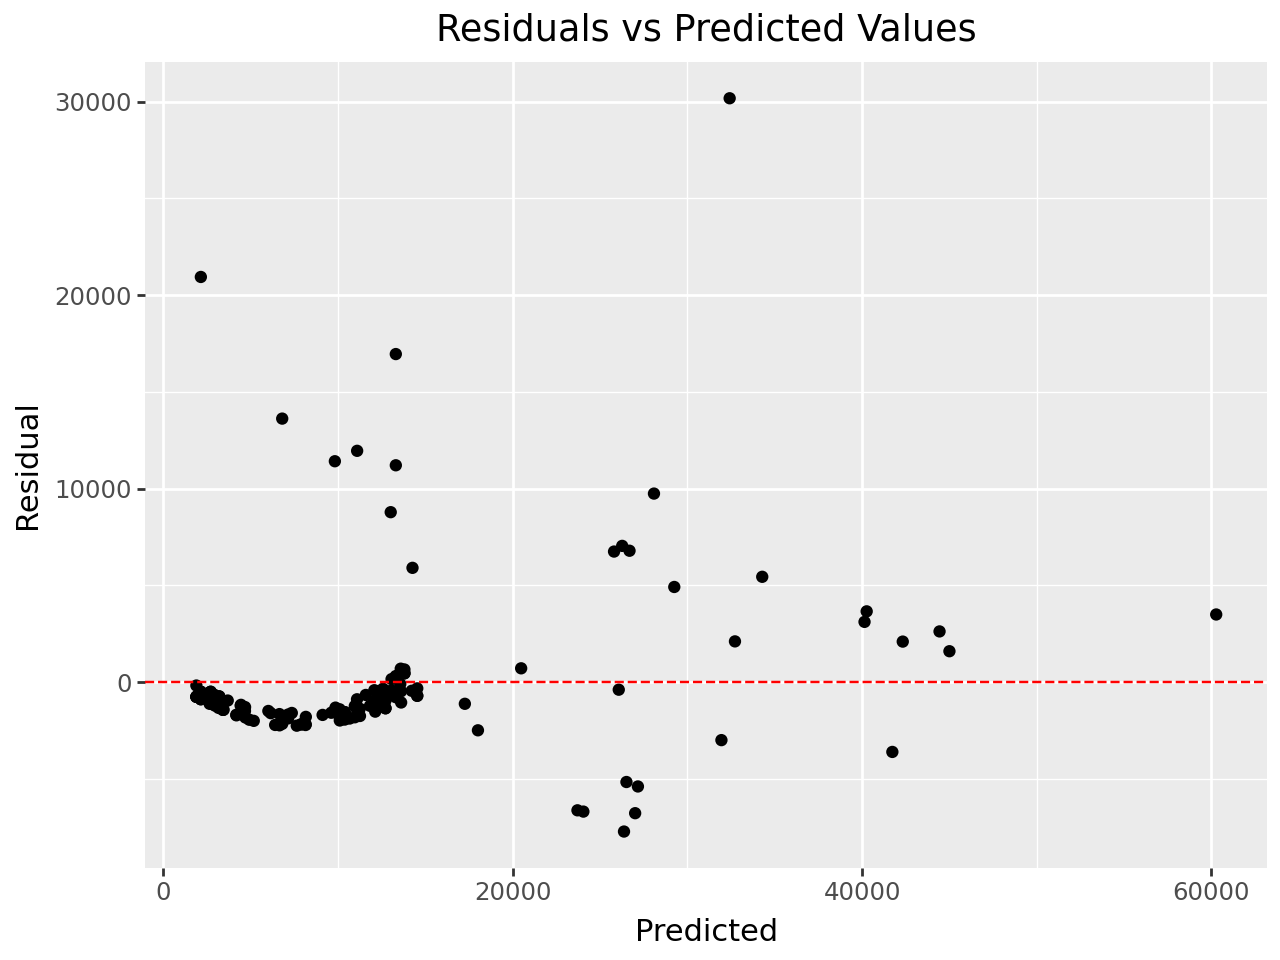

In [1161]:
from plotnine import ggplot, aes, geom_line, labs

(ggplot(final_results_df)
 + geom_point(aes(x="Predicted", y="Residual"))
  + geom_hline(yintercept=0, linetype="dashed", color="red")
 + labs(title="Residuals vs Predicted Values", x="Predicted", y="Residual"))